# Tarea 2


CC5113 - Aprendizaje Automático Bayesiano

Profesor: Pablo Guerrero

Autor: Martín Cornejo

## Paquetes necesarios

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import GPy
#GPy.plotting.change_plotting_library('plotly')

import pdb

#import plotly
#plotly.tools.set_credentials_file(username='macornejo', api_key='aMdtRsvCHjmJNB0lCd8X')

In [2]:
# se elimina la primera fila del archivo antes de cargar!
data = np.genfromtxt('data_out_mod.txt', delimiter=' ')

np.random.shuffle(data)
train_size = 375
test_size = 500 - train_size
training, test = data[:train_size,:], data[train_size:,:]

x_train = np.reshape(training[:,0], (train_size, 1))
y_train = np.reshape(training[:,1], (train_size, 1))

x_test = np.reshape(test[:,0], (test_size, 1))
y_test = np.reshape(test[:,1], (test_size, 1))

#pdb.set_trace()

def errorCuadratico(pred, labels):
    error2 = np.sum(np.power(np.absolute(np.subtract(labels, pred)), 2))
    return error2

## Distintas funciones de media

A continuación se hará regresión usando Procesos Gaussianos con distintas funciones de media, con el mismo kernel RBF.

### Media constante (cero)

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


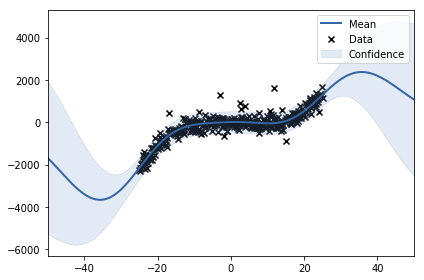

In [3]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

m = GPy.models.GPRegression(x_train, y_train,kernel);
m.optimize('bfgs', max_iters=100);
fig = m.plot([-50, 50]);
#GPy.plotting.show(fig)

Test


 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


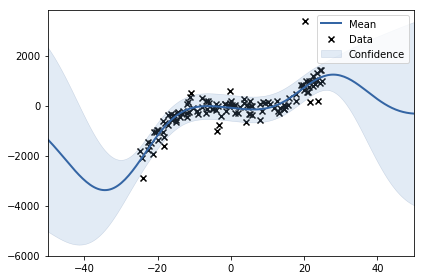

In [4]:
m.set_XY(X=x_test, Y=y_test);
fig2 = m.plot([-50, 50]);
print("Test")
#GPy.plotting.show(fig2)

In [5]:
print("El error cuadratico del test es: " + str(errorCuadratico(m.predict(x_test)[0], y_test)))

El error cuadratico del test es: 17209767.21326438


### Media lineal 

 /home/martin/.local/lib/python3.5/site-packages/GPy/kern/src/stationary.py:167: RuntimeWarning:overflow encountered in true_divide
 /home/martin/.local/lib/python3.5/site-packages/GPy/kern/src/rbf.py:43: RuntimeWarning:overflow encountered in square
 /home/martin/.local/lib/python3.5/site-packages/GPy/kern/src/rbf.py:46: RuntimeWarning:invalid value encountered in multiply
 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


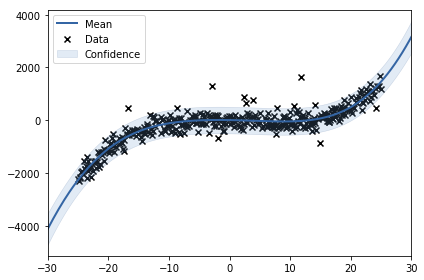

In [6]:
pendiente = 500
coef_pos = 1000
mf = GPy.core.Mapping(1,1)
mf.f = lambda x: x*pendiente + coef_pos
mf.update_gradients = lambda a,b: None

k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
lik = GPy.likelihoods.Gaussian()
m_lineal = GPy.core.GP(x_train, y_train, kernel=k, likelihood=lik, mean_function=mf)
m_lineal.optimize('bfgs', max_iters=100)
fig = m_lineal.plot([-30, 30]);
#GPy.plotting.show(fig)

Test


 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


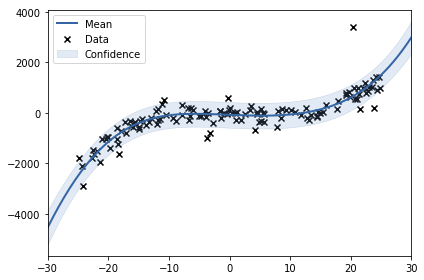

In [7]:
m_lineal.set_XY(X=x_test, Y=y_test);
fig2 = m_lineal.plot([-30, 30]);
print("Test")
#GPy.plotting.show(fig2)

In [8]:
# pdb.set_trace()
print("El error cuadratico del test es: " + str(errorCuadratico(m_lineal.predict(x_test)[0], y_test)))

El error cuadratico del test es: 18202191.983028196


### Media cuadrática 

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


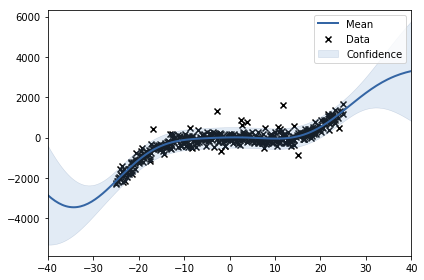

In [9]:
a2 = 1
a1 = 5
a0 = 200
mf = GPy.core.Mapping(1,1)
mf.f = lambda x: np.polyval([a2, a1, a0], x)
mf.update_gradients = lambda a,b: None

x_train = np.reshape(training[:,0], (train_size, 1))
y_train = np.reshape(training[:,1], (train_size, 1))

k = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)
lik = GPy.likelihoods.Gaussian()
m = GPy.core.GP(x_train, y_train, kernel=k, likelihood=lik, mean_function=mf)
m.optimize('bfgs', max_iters=100)
fig = m.plot([-40, 40]);
#GPy.plotting.show(fig)

## Distintas funciones de covarianza

A continuación se hará regresión usando distintas funciones de covarianza (distintos kernels), con función de media $m(\cdot) = 0$.

### Kernel MLP

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


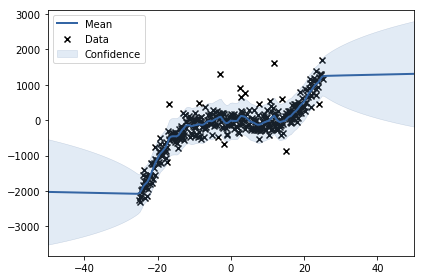

In [10]:
kernel = GPy.kern.MLP(input_dim=1, variance=1.)

x_train = np.reshape(training[:,0], (train_size, 1))
y_train = np.reshape(training[:,1], (train_size, 1))

m = GPy.models.GPRegression(x_train, y_train,kernel)
m.optimize('bfgs', max_iters=100)
fig = m.plot([-50, 50]);
#GPy.plotting.show(fig)

### Kernel Lineal

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


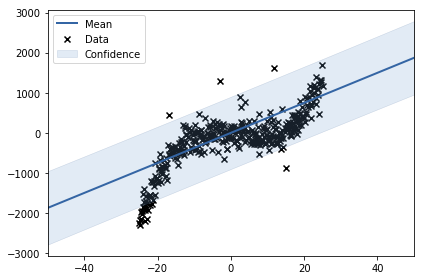

In [11]:
kernel = GPy.kern.Linear(input_dim=1)

x_train = np.reshape(training[:,0], (train_size, 1))
y_train = np.reshape(training[:,1], (train_size, 1))

m = GPy.models.GPRegression(x_train, y_train,kernel)
m.optimize('bfgs', max_iters=100)
fig = m.plot([-50, 50]);
#GPy.plotting.show(fig)

### Kernel $\textit{Rational Quadratic}$ (RQ)

 /usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:2267: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


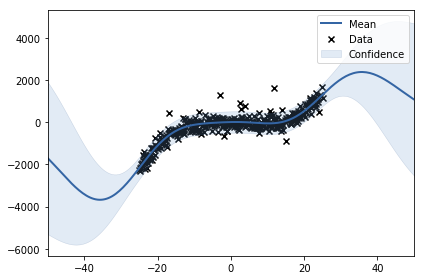

In [12]:
kernel = GPy.kern.RatQuad(input_dim=1)

x_train = np.reshape(training[:,0], (train_size, 1))
y_train = np.reshape(training[:,1], (train_size, 1))

m = GPy.models.GPRegression(x_train, y_train,kernel)
m.optimize('bfgs', max_iters=100)
fig = m.plot([-50, 50]);
#GPy.plotting.show(fig)

## Discusión

Se graficó la regresión con las siguientes configuraciones:
1. media constante (cero) y kernel RBF
2. media lineal y kernel RBF
3. media cuadrática y kernel RBF
4. media cero y kernel MLP
5. media cero y kernel lineal
6. media cero y kernel \textit{rational quadratic}

Se notó que el kernel RBF y el $\textit{rational quadratic}$ tienen una tendencia promedio a irse a cero en los extremos en donde no hay observaciones. Sin embargo el segundo tiende a mantener el intervalo de confianza en las zonas donde no hay observaciones, sin embargo el RBF aumenta notoriamente la incertidumbre en dichas zonas.

El kernel lineal arroja el resultado más parejo en todo el recorrido de la regresión, ya que los intervalos y la media se mantienen constantes. Esta regresión es útil solo si se desea predecir la tendencia promedio de la función desconocida, dado que no se adapta a la forma de la función, se concluye que no es útil a la hora de predecir muestras en detalle.

El kernel MLP tiene un buen comportamiento en la zona de las observaciones, pero en los extremos la incertidumbre aumenta al igual que en el kernel RBF y además las medias se mantienen en valores fijos distintos de cero, lo cual puede ser una predicción forzada.

El mejor resultado se obtuvo con la función de media lineal + kernel RBF. Se ve que en los extremos sin observaciones la regresión continúa con la forma polinomial de la función original y los intervalos de confianza se mantienen. Se observa que en el conjunto de test practicamente la gran mayoría de las observaciones se mantienen dentro de la banda de confianza y el error cuadrático, comparado con el resultado obtenido en la Minitarea 1, es menor que el obtenido en el mejor resultado (kernel polinomial grado 6).